## Body Fat Percentage Prediction

predict the bodyfat percentage using basic measurements like age, weight, height and some body circumferences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bodyfat.csv')

DATA EXPLORATION AND PREPROCESSING

In [3]:
df.head()

,BodyFat,Age,Gender,Weight_kg,Height_cm,Abdomen_cm,Chest_cm,Hip_cm,Thigh_cm
0,33.8,56,Male,99.2,182.6,95.1,88.6,90.2,36.7
1,35.8,69,Female,74.8,148.6,82.5,68.6,68.1,25.3
2,28.7,46,Female,50.4,146.7,63.7,57.2,60.3,24.9
3,26.6,32,Female,68.6,153.6,76.9,66.9,67.7,28.9
4,10.5,60,Male,50.0,165.9,60.1,65.7,63.2,20.3


In [4]:
rows = df.shape[0]
cols = df.shape[1]
print(f'There are {rows} rows and {cols} columns')

There are 10117 rows and 9 columns


In [5]:
df.tail()

,BodyFat,Age,Gender,Weight_kg,Height_cm,Abdomen_cm,Chest_cm,Hip_cm,Thigh_cm
10112,12.2,28,Male,67.0,175.9,69.1,66.5,76.4,26.3
10113,26.4,61,Female,58.7,164.0,63.9,63.4,66.6,24.8
10114,46.8,45,Female,94.7,174.9,99.6,81.9,83.5,34.3
10115,22.3,35,Female,64.5,159.2,71.0,70.8,65.0,24.7
10116,23.8,30,Female,65.2,160.5,78.8,66.7,67.0,26.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10117 entries, 0 to 10116
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BodyFat     10117 non-null  float64
 1   Age         10117 non-null  int64  
 2   Gender      10117 non-null  object 
 3   Weight_kg   10117 non-null  float64
 4   Height_cm   10117 non-null  float64
 5   Abdomen_cm  10117 non-null  float64
 6   Chest_cm    10117 non-null  float64
 7   Hip_cm      10117 non-null  float64
 8   Thigh_cm    10117 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 711.5+ KB


In [7]:
df.describe()

,BodyFat,Age,Weight_kg,Height_cm,Abdomen_cm,Chest_cm,Hip_cm,Thigh_cm
count,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000
mean,27.499723,49.321835,82.296274,168.577849,86.767579,76.678571,79.185381,30.562262
std,7.406373,18.185248,18.066464,9.886432,14.132782,8.972262,9.950511,4.962038
min,4.000000,18.000000,30.400000,135.200000,47.300000,49.200000,48.600000,15.300000
25%,22.400000,34.000000,69.400000,161.300000,76.700000,70.400000,72.100000,27.100000
50%,27.300000,49.000000,80.400000,168.400000,85.500000,76.000000,78.400000,30.200000
75%,32.300000,65.000000,93.200000,175.800000,95.200000,82.300000,85.300000,33.600000
max,55.000000,80.000000,192.700000,208.600000,172.600000,127.500000,134.900000,58.200000


Check for missing values

In [8]:
df.isna().sum()

BodyFat       0
Age           0
Gender        0
Weight_kg     0
Height_cm     0
Abdomen_cm    0
Chest_cm      0
Hip_cm        0
Thigh_cm      0
dtype: int64

Check for duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(df[['Gender']])
df_gender = ohe.transform(df[['Gender']])
df_gender = pd.DataFrame(df_gender, columns = ohe.get_feature_names_out())

In [11]:
df = pd.concat((df, df_gender), axis = True)

In [12]:
df.drop('Gender', axis = True, inplace = True)

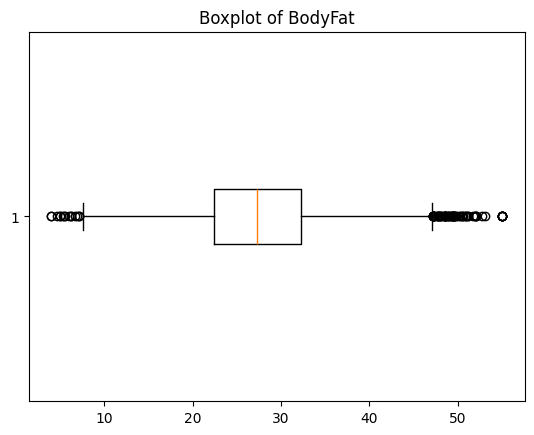

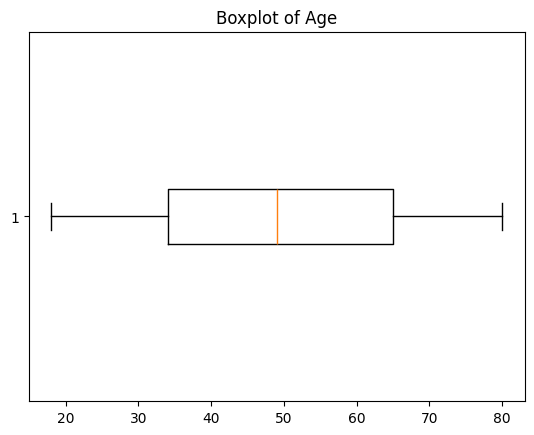

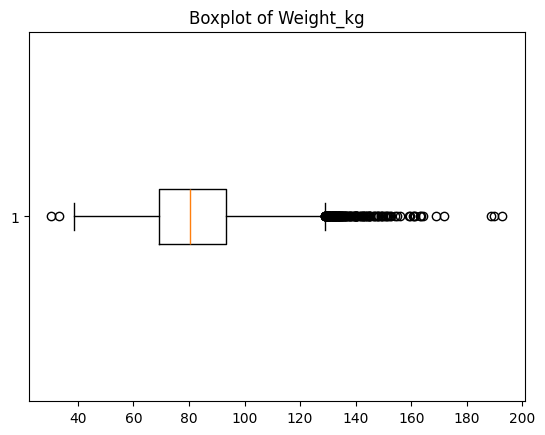

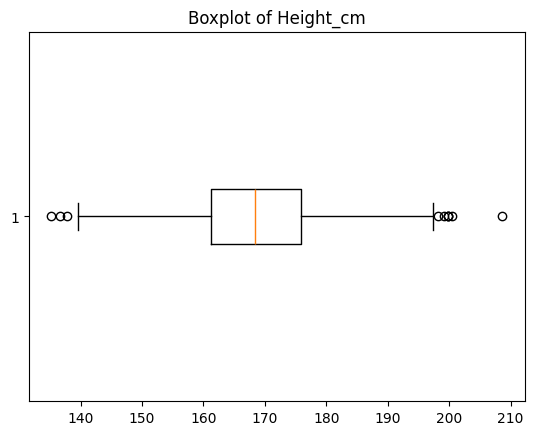

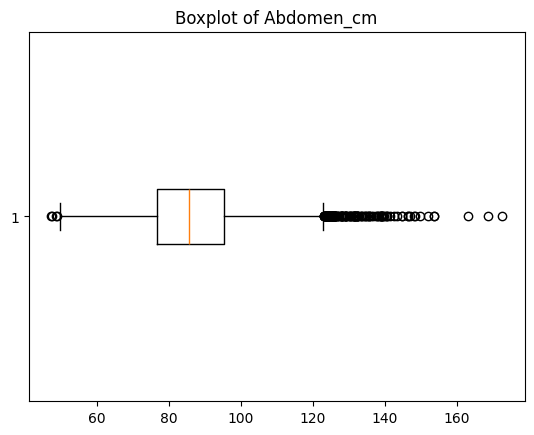

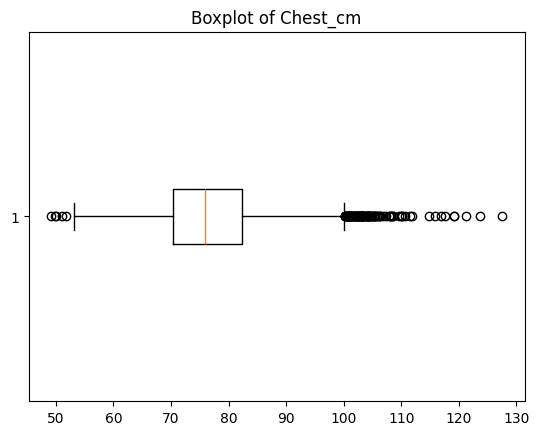

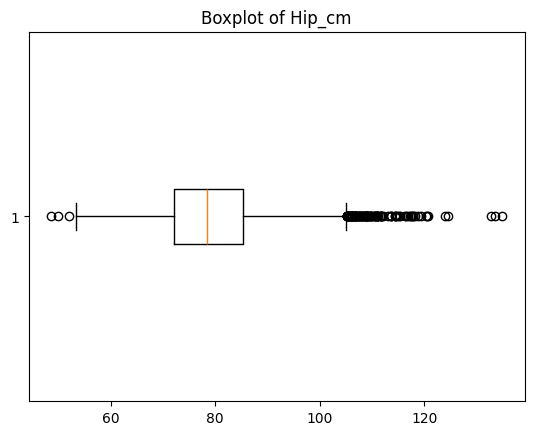

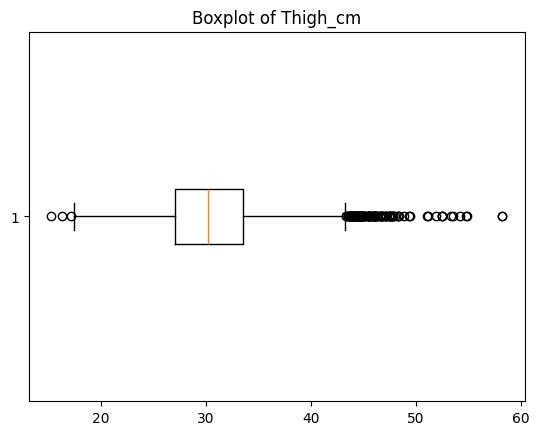

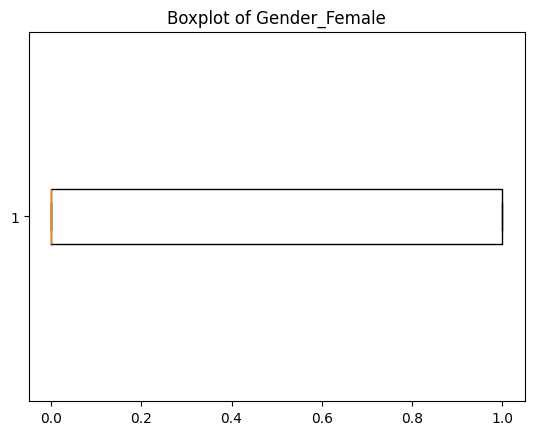

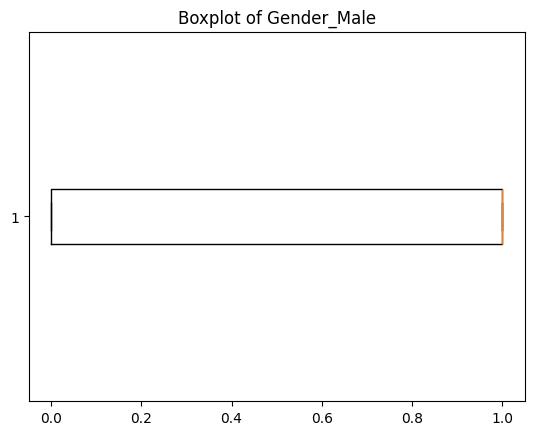

In [13]:
for i in df.columns:
  plt.boxplot(df[i], vert = False)
  plt.title(f'Boxplot of {i}')
  plt.show()

### Data Vizualization

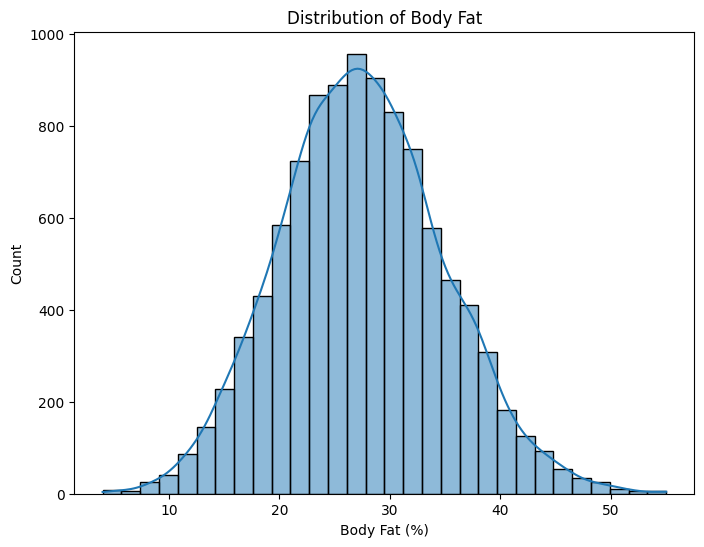

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BodyFat'], kde=True, bins=30)
plt.title(f'Distribution of Body Fat')
plt.xlabel( 'Body Fat (%)')
plt.show()

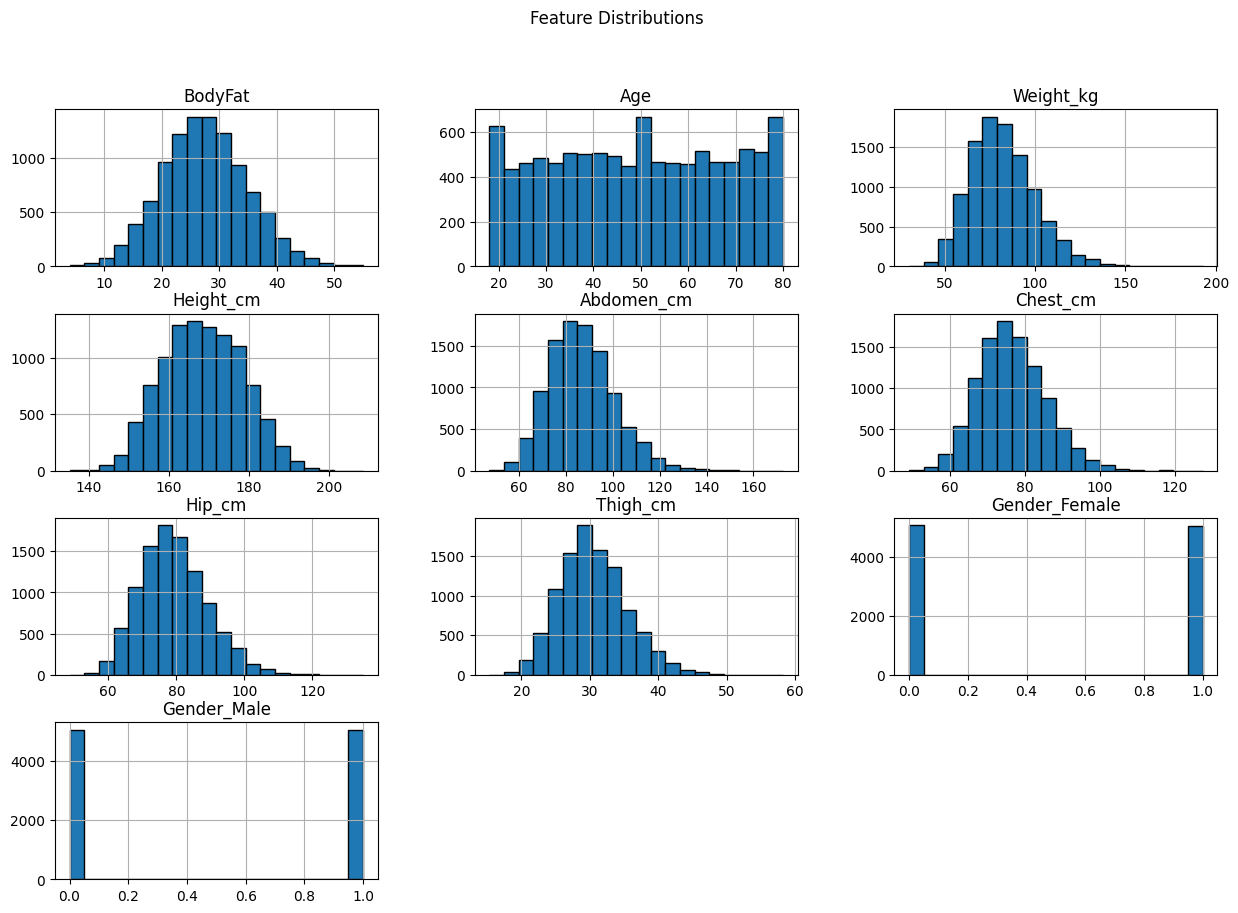

In [15]:
df.hist(bins = 20, edgecolor = 'black', figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

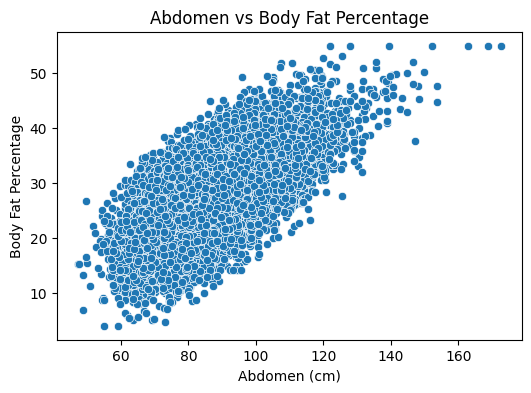

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Abdomen_cm', y='BodyFat', data=df)
plt.title('Abdomen vs Body Fat Percentage')
plt.xlabel('Abdomen (cm)')
plt.ylabel('Body Fat Percentage')
plt.show()


Here I plotted abdomen circumference against body fat percentage.
We can clearly see a strong positive relationship, which means abdomen size is a very important predictor.

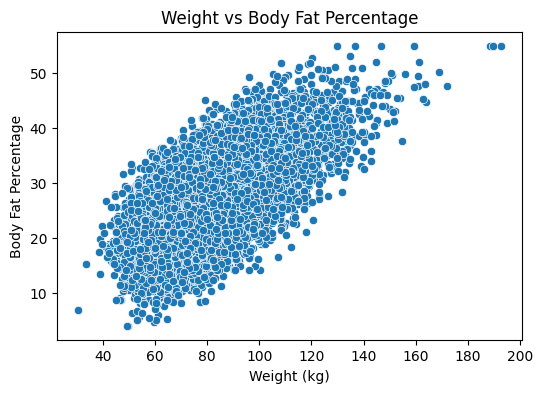

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Weight_kg', y='BodyFat', data=df)
plt.title('Weight vs Body Fat Percentage')
plt.xlabel('Weight (kg)')
plt.ylabel('Body Fat Percentage')
plt.show()

This plot shows how body weight relates to body fat percentage.
There is a visible trend

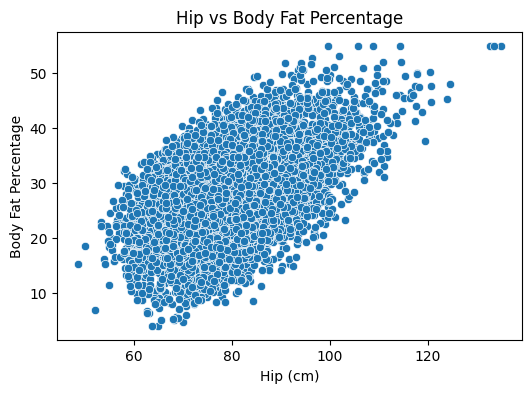

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Hip_cm', y='BodyFat', data=df)
plt.title('Hip vs Body Fat Percentage')
plt.xlabel('Hip (cm)')
plt.ylabel('Body Fat Percentage')
plt.show()


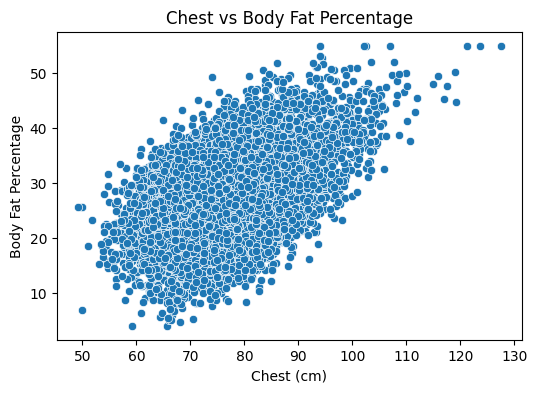

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Chest_cm', y='BodyFat', data=df)
plt.title('Chest vs Body Fat Percentage')
plt.xlabel('Chest (cm)')
plt.ylabel('Body Fat Percentage')
plt.show()


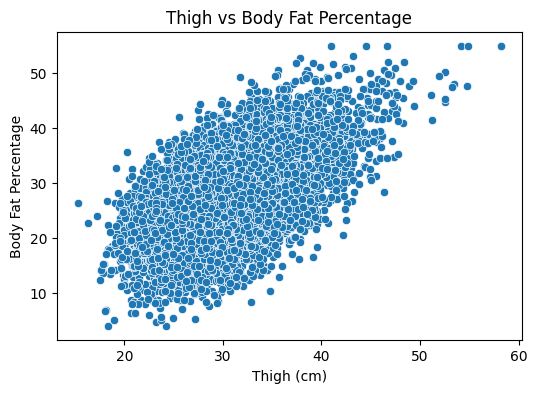

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Thigh_cm', y='BodyFat', data=df)
plt.title('Thigh vs Body Fat Percentage')
plt.xlabel('Thigh (cm)')
plt.ylabel('Body Fat Percentage')
plt.show()


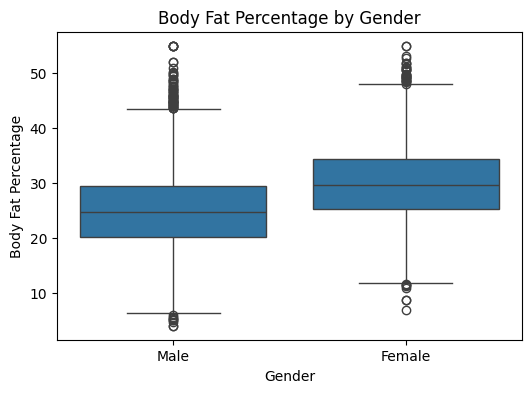

In [21]:
df1 = pd.read_csv('bodyfat.csv')

plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='BodyFat', data=df1)
plt.title('Body Fat Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Body Fat Percentage')
plt.show()


This boxplot compares body fat percentage between males and females.
We can see that females generally have a higher body fat percentage compared to males

In [22]:

correlation_matrix = df.corr()
correlation_matrix

,BodyFat,Age,Weight_kg,Height_cm,Abdomen_cm,Chest_cm,Hip_cm,Thigh_cm,Gender_Female,Gender_Male
BodyFat,1.000000,0.304583,0.578172,-0.070534,0.597175,0.453152,0.457394,0.532606,0.328765,-0.328765
Age,0.304583,1.000000,-0.000043,-0.011175,0.001029,-0.001444,-0.003043,0.001461,0.008632,-0.008632
Weight_kg,0.578172,-0.000043,1.000000,0.545638,0.959136,0.925818,0.956489,0.914303,-0.374205,0.374205
Height_cm,-0.070534,-0.011175,0.545638,1.000000,0.530279,0.655622,0.697825,0.494144,-0.690980,0.690980
Abdomen_cm,0.597175,0.001029,0.959136,0.530279,1.000000,0.890426,0.919292,0.876323,-0.365887,0.365887
Chest_cm,0.453152,-0.001444,0.925818,0.655622,0.890426,1.000000,0.923403,0.845923,-0.451949,0.451949
Hip_cm,0.457394,-0.003043,0.956489,0.697825,0.919292,0.923403,1.000000,0.873668,-0.480838,0.480838
Thigh_cm,0.532606,0.001461,0.914303,0.494144,0.876323,0.845923,0.873668,1.000000,-0.336556,0.336556
Gender_Female,0.328765,0.008632,-0.374205,-0.690980,-0.365887,-0.451949,-0.480838,-0.336556,1.000000,-1.000000
Gender_Male,-0.328765,-0.008632,0.374205,0.690980,0.365887,0.451949,0.480838,0.336556,-1.000000,1.000000


In [23]:
correlation_matrix['BodyFat']

BodyFat          1.000000
Age              0.304583
Weight_kg        0.578172
Height_cm       -0.070534
Abdomen_cm       0.597175
Chest_cm         0.453152
Hip_cm           0.457394
Thigh_cm         0.532606
Gender_Female    0.328765
Gender_Male     -0.328765
Name: BodyFat, dtype: float64

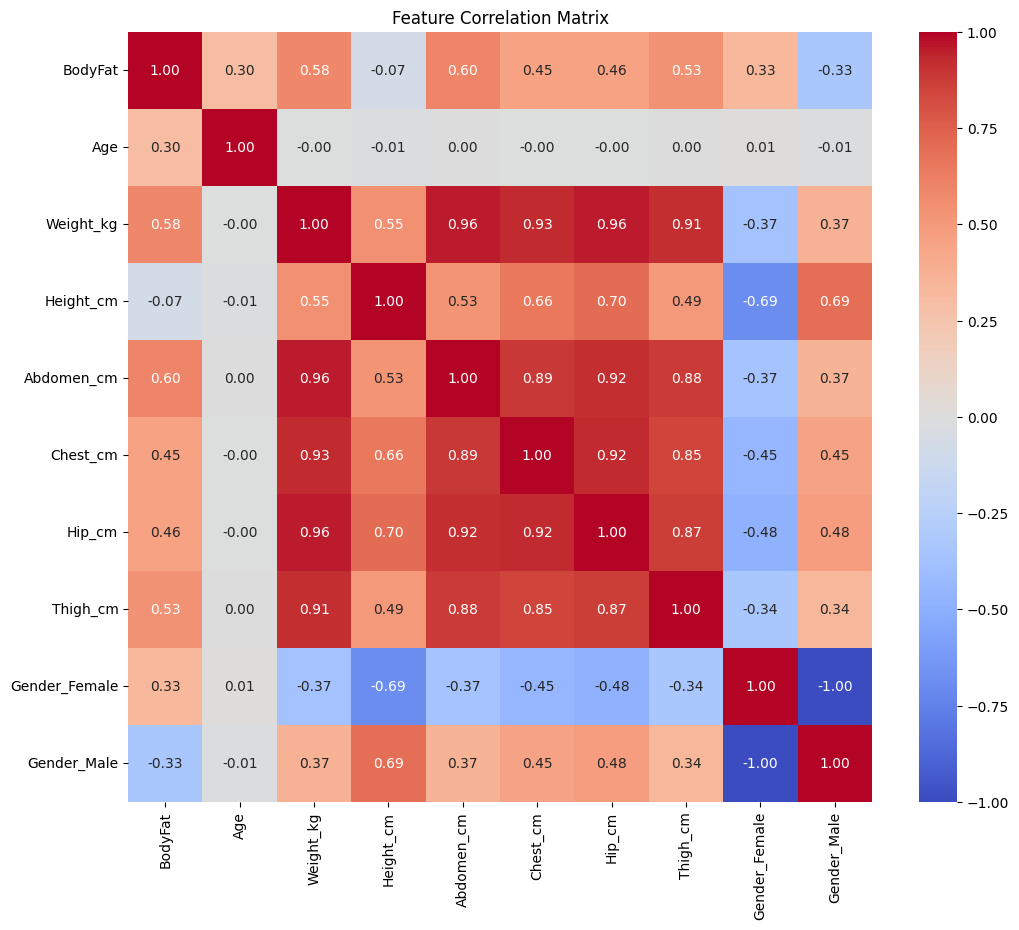

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

Feature Selection

In [25]:
x = df.drop(['BodyFat'], axis=1)
y = df['BodyFat']

Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state = 0)

Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Model Training

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

results = {}

def evaluate(name, model):
  model.fit(x_train, y_train)
  pred_train = model.predict(x_train)
  pred_test = model.predict(x_test)

  train_accuracy = r2_score(y_train, pred_train)
  test_accuracy = r2_score(y_test, pred_test)
  gap = abs(train_accuracy - test_accuracy)

  if gap < 0.02:
    status = 'Good Fit'
  elif gap > 0.02:
    status = 'Over Fit'
  else:
    status = 'Under Fit'

  results[name] = {
    'model': model,
    'train accuracy': train_accuracy,
    'test accuracy' : test_accuracy,
    'gap': gap,
    'status': status,
    'pred_test': pred_test,
  }
  print(f"{name}: Train={train_accuracy:.3f}, Test={test_accuracy:.3f}, Gap={gap:.3f}, {status}")

for name,m in models.items():
  evaluate(name,m)


Linear Regression: Train=0.812, Test=0.803, Gap=0.010, Good Fit
Ridge Regression: Train=0.812, Test=0.803, Gap=0.010, Good Fit
Lasso Regression: Train=0.722, Test=0.720, Gap=0.002, Good Fit
Elastic Net Regression: Train=0.692, Test=0.690, Gap=0.003, Good Fit
Decision Tree Regressor: Train=1.000, Test=0.579, Gap=0.421, Over Fit


Summary Table

In [29]:
summary=pd.DataFrame({
    name:{
        'Train Accuracy':info['train accuracy'],
        'Test Accuracy':info['test accuracy'],
        'Gap':info['gap'],
        'Status':info['status']
    } for name,info in results.items()
}).T

summary

,Train Accuracy,Test Accuracy,Gap,Status
Linear Regression,0.812435,0.802925,0.00951,Good Fit
Ridge Regression,0.812435,0.80293,0.009505,Good Fit
Lasso Regression,0.721987,0.720064,0.001924,Good Fit
Elastic Net Regression,0.692061,0.689504,0.002558,Good Fit
Decision Tree Regressor,1.0,0.579078,0.420922,Over Fit


Performance Matrix

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
matrix_data = []
for name, data in results.items():
    
    y_pred = data['pred_test']
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = data['test accuracy']
    
    matrix_data.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

performance_df = pd.DataFrame(matrix_data)

performance_df.set_index('Model', inplace=True)

print("--- Model Performance Matrix ---")
print(performance_df)

--- Model Performance Matrix ---
                              MAE        MSE      RMSE  R2 Score
Model                                                           
Linear Regression        2.596156  10.490902  3.238966  0.802925
Ridge Regression         2.596117  10.490627  3.238924  0.802930
Lasso Regression         3.104397  14.901871  3.860294  0.720064
Elastic Net Regression   3.270575  16.528683  4.065548  0.689504
Decision Tree Regressor  3.822233  22.406986  4.733602  0.579078


Hypertuning

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()

grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)


grid.fit(x_train, y_train)

best_ridge = grid.best_estimator_
best_alpha = grid.best_params_['alpha']

print("Best alpha:", best_alpha)

pred_train = best_ridge.predict(x_train)
pred_test = best_ridge.predict(x_test)

train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)
gap = abs(train_r2 - test_r2)

print(f"Tuned Ridge -> Train R2: {train_r2:.3f}, Test R2: {test_r2:.3f}, Gap: {gap:.3f}")



Best alpha: 10
Tuned Ridge -> Train R2: 0.812, Test R2: 0.803, Gap: 0.009


In [ ]:
import pickle

final_model = best_ridge

with open("final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(sc, f)

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(list(x.columns), f)

with open('onehot.pkl', 'wb') as f:
    pickle.dump(ohe, f)

print("Final tuned model saved successfully!")


Final tuned model saved successfully!
